# 1.

In [1]:
import pandas as pd
import matplotlib.pyplot as plot
import matplotlib
import numpy as np

archivo=pd.ExcelFile('Tarea 1.xlsx')
df=archivo.parse('Recursos')
#print (df.info())

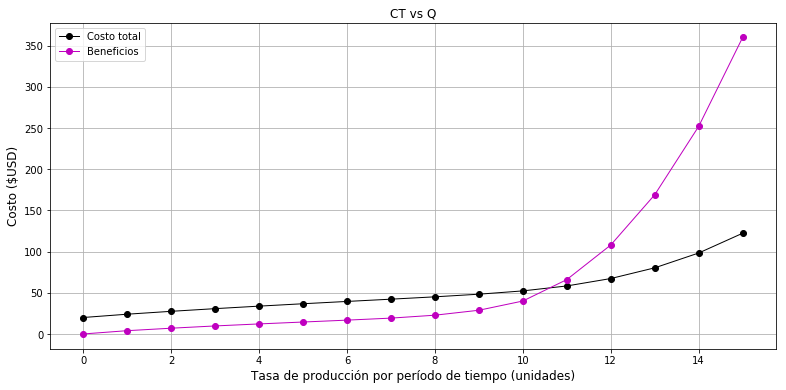

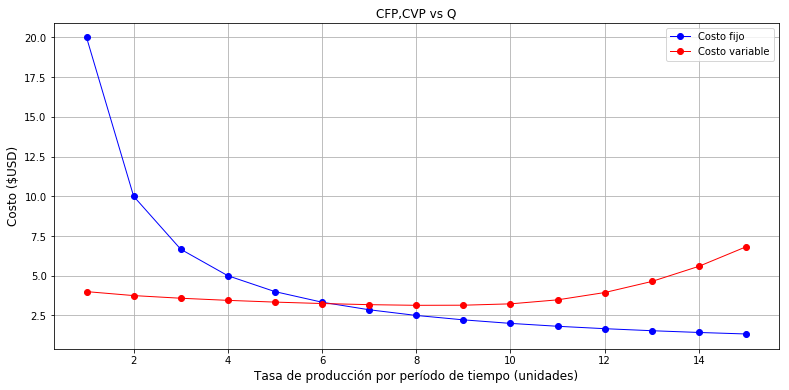

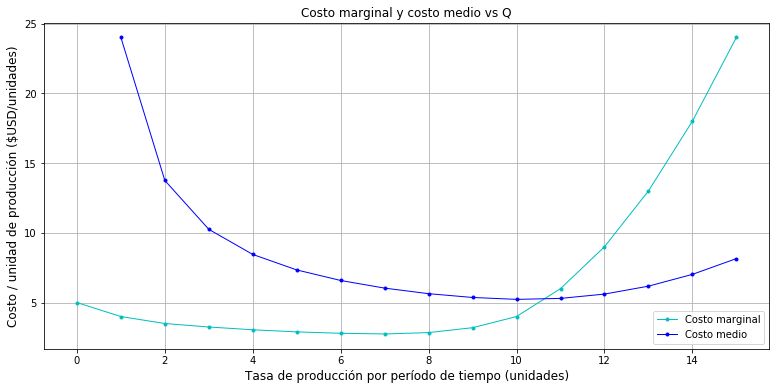

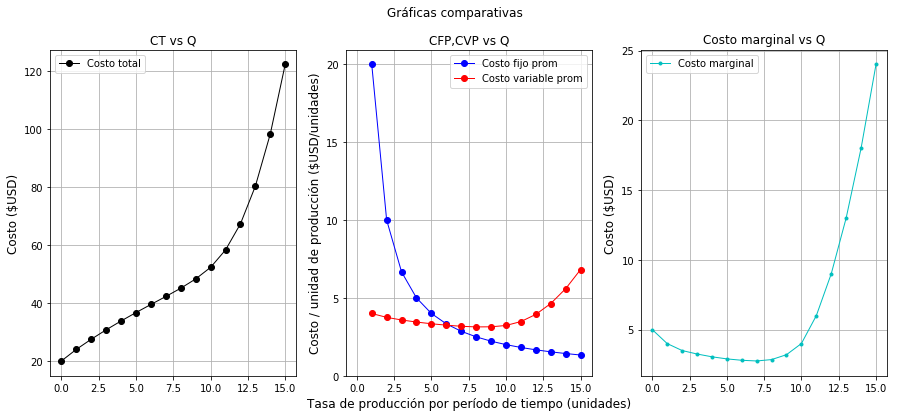

In [12]:
Q=df['Tasa de producción por período de tiempo (unidades)']
CT=df['COSTO TOTAL ($USD)']
plot.close('all')


CFP=[]
Cm=[]
CM=[]
B=[]
U=[]
E=[]
Cv=df['COSTO TOTAL ($USD)']-20
df['COSTO Variable ($USD)']=Cv
CVP=[]


for i in range (0,15,1):
    CFP.append(20/Q[i+1])
    CVP.append(Cv[i+1]/Q[i+1])
    
for i in range (0,16,1):    
    if i==0:
        cm=5 #Valor asumido
        Cm.append(cm)
    else:
        deltact=CT[i]-CT[i-1]
        deltaq=Q[i]-Q[i-1]
        cm=deltact/deltaq
        Cm.append(cm)
        cmedio=CT[i]/Q[i]
        CM.append(cmedio)
        deltacm=Cm[i]-Cm[i-1]        
    b=cm*Q[i]
    B.append(b)   
    u=b-CT[i]
    U.append(u)

plot.figure("Punto 1",figsize=[13,6])
plot.plot(Q,CT,'-o',color='k',lw=1)
plot.plot(Q,B,'-o',color='m',lw=1)
plot.title('CT vs Q')
plot.xlabel("Tasa de producción por período de tiempo (unidades)",fontsize=12)
plot.ylabel("Costo ($USD)",fontsize=12)
plot.grid()
plot.legend(['Costo total','Beneficios'])
plot.savefig('Costo_total_vs_nivel_produccion.png',dpi=100,bbox_inches='tight')

plot.figure("Costos fijos y variables",figsize=[13,6])
plot.plot(Q[1:],CFP,'-o',color='b',lw=1) 
plot.plot(Q[1:],CVP,'-o',color='r',lw=1)
plot.title('CFP,CVP vs Q')
plot.xlabel("Tasa de producción por período de tiempo (unidades)",fontsize=12)
plot.ylabel("Costo ($USD)",fontsize=12)
plot.grid()
plot.legend(['Costo fijo','Costo variable'])
plot.savefig('Costo_total_vs_nivel_produccion1.png',dpi=100,bbox_inches='tight')

plot.figure("Costo marginal y costo medio",figsize=[13,6])
plot.plot(Q,Cm,'-o',color='c',lw=1,ms=3) 
plot.plot(Q[1:],CM,'-o',color='b',lw=1,ms=3) 
plot.title('Costo marginal y costo medio vs Q')
plot.xlabel("Tasa de producción por período de tiempo (unidades)",fontsize=12)
plot.ylabel("Costo / unidad de producción ($USD/unidades)",fontsize=12)
plot.grid()
plot.legend(['Costo marginal','Costo medio'])
plot.savefig('CMyCm.png',dpi=100,bbox_inches='tight')

fig, axs = plot.subplots(nrows=1, ncols=3, sharex=True,figsize=[15,6])

ax=axs[0]
ax.plot(Q,CT,'-o',color='k',lw=1)
ax.set_title('CT vs Q')
ax.set_ylabel("Costo ($USD)",fontsize=12)
ax.grid()
ax.legend(['Costo total'])

ax = axs[1]
ax.plot(Q[1:],CFP,'-o',color='b',lw=1) 
ax.plot(Q[1:],CVP,'-o',color='r',lw=1)
ax.set_title('CFP,CVP vs Q')
ax.set_ylabel("Costo / unidad de producción ($USD/unidades)",fontsize=12)
ax.set_yticks([0,5,10,15,20])
ax.set_xlabel("Tasa de producción por período de tiempo (unidades)",fontsize=12)
ax.grid()
ax.legend(['Costo fijo prom','Costo variable prom'])

ax = axs[2]
ax.plot(Q,Cm,'-o',color='c',lw=1,ms=3) 
ax.set_title('Costo marginal vs Q')
ax.set_ylabel("Costo ($USD)",fontsize=12)
ax.grid()
ax.legend(['Costo marginal','Costo medio'])


fig.suptitle('Gráficas comparativas')
fig.savefig('imagen1.png')

plot.show()

**1.a**
Dado que la producción que maximiza la rentabilidad se da cuando el costo medio es igual al costo marginal, en la gráfica 3 podemos observar que dicho nivel de producción es alrededor de 10 unidades

**1.b**
Para determinar el rango de utilidad máxima graficamos utilidad contra nivel de producción:

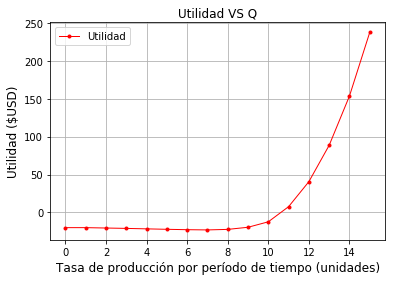

In [13]:
plot.figure("Utilidad vs Q")
plot.plot(Q,U,'-o',color='r',lw=1,ms=3)  
plot.title('Utilidad VS Q')
plot.xlabel("Tasa de producción por período de tiempo (unidades)",fontsize=12)
plot.ylabel("Utilidad ($USD)",fontsize=12)
plot.grid()
plot.legend(['Utilidad'])
plot.savefig('utilidad.png',dpi=100,bbox_inches='tight')

Dado que para obtener una utilidad positiva se debe estar por encima del valor de producción que maximiza la rentabilidad, es decir Q* el cual se ha establecido en 10, y dado que la utilidad presenta un comportamiento que tiende a crecer con el nivel de producción, el rango de precio para el cual se maximiza la utilidad estaría en los niveles de producción [10,15] unidades; lo que establece un rango de precios de [6,18] $USD

**1.c**
Para establecer la elasticidad de la oferta se emplea la siguiente expresión:

$$E = \frac{\Delta Q}{\Delta P}\cdot\frac{P_{i}+P_{i-1}}{Q_{i}+Q_{i-1}}$$
Donde:
$$\Delta Q = Q_{i}-Q_{i-1}$$$$\Delta P = P_{i}-P_{i-1}$$ 
En este caso se comenzará el subíndice en i=1 y terminará en 15. A continuación se presenta la curva de oferta y la curva que representa la elasticidad:

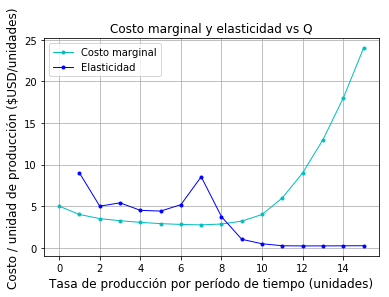

In [14]:
E=[]
for i in range(1,16,1):
    deltaq = Q[i]-Q[i-1]
    deltap = Cm[i]-Cm[i-1]
    e=abs((deltaq/deltap)*((Cm[i]+Cm[i-1])/(Q[i]+Q[i-1])))
    E.append(e)

plot.figure("Costo marginal y elasticidad")
plot.plot(Q,Cm,'-o',color='c',lw=1,ms=3) 
plot.plot(Q[1:],E,'-o',color='b',lw=1,ms=3) 
plot.title('Costo marginal y elasticidad vs Q')
plot.xlabel("Tasa de producción por período de tiempo (unidades)",fontsize=12)
plot.ylabel("Costo / unidad de producción ($USD/unidades)",fontsize=12)
plot.grid()
plot.legend(['Costo marginal','Elasticidad'])
plot.savefig('elasticidad.png',dpi=100,bbox_inches='tight')
 

# 3.

**3.a**
La ecuación de costo promedio se obtiene dividiendo el costo total entre el nivel de producción, ésta será:
$$CM = \frac{100}{A}+10-0.001A+0.000001A^2$$


**3.b**
La ecuación de costo marginal se obtiene derivando el costo total respecto a el nivel de producción, ésta será:
$$Cm = 10-0.002A+0.000003A^2$$

**3.c**

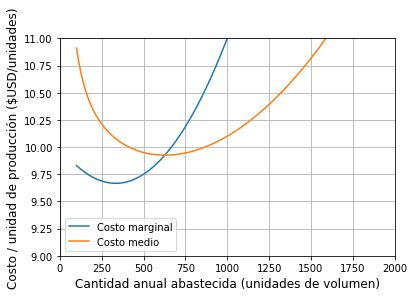

In [16]:
A=np.linspace(100,8000,2000)
CMedio=(100/A)+10-0.001*A+0.000001*(A**2)
Cmarginal=10-0.002*A+0.000003*(A**2)
plot.figure('Cmedio y Cmarginal')
plot.grid()
plot.plot(A,Cmarginal)
plot.plot(A,CMedio)
plot.ylim(9,11)
plot.xlim(0,2000)
plot.xlabel("Cantidad anual abastecida (unidades de volumen)",fontsize=12)
plot.ylabel("Costo / unidad de producción ($USD/unidades)",fontsize=12)
plot.legend(['Costo marginal','Costo medio'])
plot.savefig('3c.png',dpi=100,bbox_inches='tight')

In [40]:
for i in range(0,len(CMedio),1):
    if np.round(CMedio[i],2)==np.round(Cmarginal[i],2):
        print (np.round((A[i]),1))

629.6


**3.d**
La máxima rentabilidad se da cuando el costo marginal es igual al costo medio, este valor corresponde a un volumen de: 629.6 unidades de volumen

**3.e** 

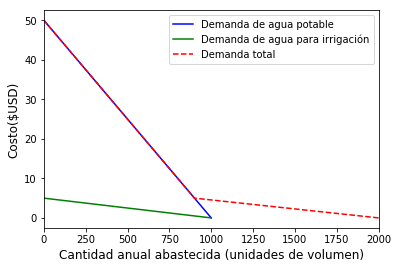

In [17]:
#Curvas de demanda
P=np.linspace(0,50,1000)

Au=1000-20*P
Ai=1000-200*P
At = []
for i in range(0,len(P)):
    if i <= 100:
        at = Au[i]+Ai[i]
        At.append(at)
    else:
        at = Au[i]
        At.append(at)

#Curva de demanda total del mercado
plot.figure('Curva de demanda')
plot.plot(Au,P,'b')
plot.plot(Ai,P,'g')
plot.plot(At,P,'--r')
plot.xlabel("Cantidad anual abastecida (unidades de volumen)",fontsize=12)
plot.ylabel("Costo($USD)",fontsize=12)
plot.xlim(0,2000)
plot.legend(['Demanda de agua potable','Demanda de agua para irrigación','Demanda total'])
plot.savefig('3e.png',dpi=100,bbox_inches='tight')

**3.f** 
Para determinar el punto de equilibrio se grafica la curva de demanda total del mercado contra la curva de oferta que será la curva de costo marginal y los valores de equilibrio serán aquellos donde se cruzan, estos valores leidos desde la gráfica son:
$$Q_{e} = 793.9\; unidades\;de\;volumen $$ $$ P_{e} = 10.3\; \$ USD $$ 

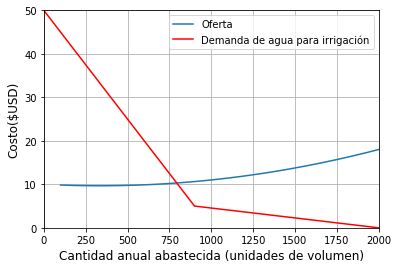

In [18]:
#precio y cantidad de equilibrio
of=100+10*A-0.001*(A**2)+0.000001*(A**3)
plot.figure('Punto de equiibrio')
plot.plot(A,Cmarginal)
plot.plot(At,P,c='r')
plot.grid()
plot.xlabel("Cantidad anual abastecida (unidades de volumen)",fontsize=12)
plot.ylabel("Costo($USD)",fontsize=12)
plot.xlim(0,2000)
plot.ylim(0,50)
plot.legend(['Oferta','Demanda de agua para irrigación','Demanda total'])
plot.savefig('3f.png',dpi=100,bbox_inches='tight')


**3.g**
Asumiendo que el precio de equilibrio será el precio de operación de la planta, éste valor maximizará la rentabilidad al tomarse como el valor de costo marginal que maximiza la utilidad, de manera que la máxima rentabilidad se da cuando el costo marginal(precio de equilibrio) intercepte la curva de costo medio, de donde se obtienen dos valores que maximizan: . De dichos valores se toma el mayor dado que se encuentra por encima de la cantidad de equilibrio.

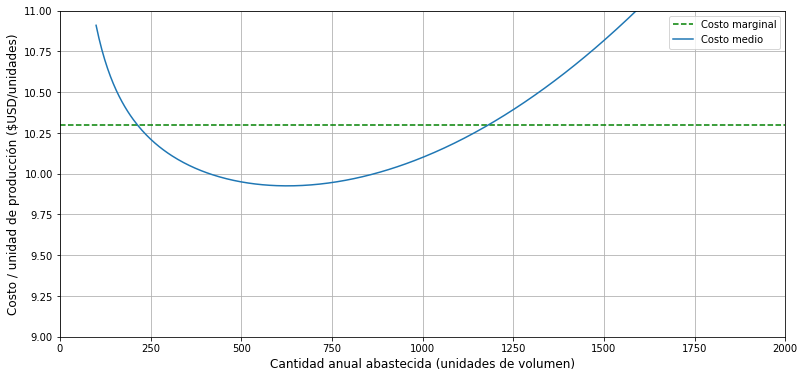

In [20]:
A=np.linspace(100,8000,2000)
CMedio=(100/A)+10-0.001*A+0.000001*(A**2)
plot.figure('Cmedio y precio equilibrio',figsize=[13,6])
plot.axhline(10.3,ls='--',c='g')
plot.grid()
plot.plot(A,CMedio)
plot.ylim(9,11)
plot.xlim(0,2000)
plot.xlabel("Cantidad anual abastecida (unidades de volumen)",fontsize=12)
plot.ylabel("Costo / unidad de producción ($USD/unidades)",fontsize=12)
plot.legend(['Costo marginal','Costo medio'])
plot.savefig('3g.png',dpi=100,bbox_inches='tight')

# 4


# 5.

Los datos suministrados del ejercicio son:

| Datos | Valores |
| :---: | :---: |
| Caudal firme (m^3/S) | 4 |
| Altura media (m) | 230 |
| Eficiencia central (%) | 75 |
| Vida útil (años) | 50 |
| Inversión inicial (miles USD) | 2000 |
| AOM anual (miles USD/año) | 100 |
| Tasa de descuento (%) | 10 |
| Precio venta de potencia (centavos/kwhr) | 0.6 | 

**5.a**
De ahora en adelante:
El sub-índicie P simboliza valores presentes
El sub-índicie A simboliza valores uniformes
El sub-índicie F simboliza valores futuros
El sub-índicie G simboliza valores en gradiente

La potencia se estima como:
$$Pot = 0,75\cdot9,81\cdot4\cdot230 = 6768.9\;kW $$

Se procede a calcular el beneficio anual como:
$$B_{A} = \frac{0,6\cdot Pot\cdot 24\cdot365}{100 \cdot 1000} = 355,77\;\frac{miles\;USD}{año} $$
Con el beneficio anualizado se procede a determinar el valor presente del beneficio y del AOM como:
$$B_{P} = B_{A} \cdot \left(\frac{P}{A}, 10\% ,50 \right) = 3527,43\;miles\;USD $$
$$AOM_{P} = AOM_{A}\cdot \left(\frac{P}{A}, 10\% ,50 \right) = 991,48\;miles\;USD $$

El ingreso neto del proyecto se calculará como:
$$I_{neto} = -Inv-AOM_{P}+B_{P} = 535,95\;miles\;USD $$

**5.b**
Para el costo anual de energía se cuenta con el AOM anualizado y se pocede a determinar el valor anual de la inversión inicial como:
$$Inv_{A} = Inv_{P}\cdot \left(\frac{A}{P}, 10\% ,50 \right) = 201,72\;\frac{miles\;USD}{año} $$
Ahora el valor del costo aual de generación de energía será:
$$Costo\;anual = Inversión\;inicial_{A}+AOM_{A} = 301,72\; \frac{miles\;USD}{año} $$



**5.c**
La TIR será:
$$TIR \approx 12,78 \%$$


**5.d**
El precio de energía para que la planta opere sin ganancias es:
$$P_{\0 ganancias} = 0,509354\frac{centavos}{kW\cdot hora}$$

In [13]:
import numpy as np

pot=0.75*9.81*4*230
inv5,AOM5,id5,n5=2000,100,0.1,50
def t1(x,y):
    t1=((1+y)**x)-1
    return(t1)           
def t2(x,y):
    t2=(y*((1+y)**x))
    return(t2)   
banual5=((0.6*pot*24*365)/100)/1000
AOMp5=AOM5*(t1(n5,id5)/t2(n5,id5))
btp5=banual5*(t1(n5,id5)/t2(n5,id5))  

#Ingreso neto del proyecto
Ineto=-inv5-AOMp5+btp5
#Costo anual de generación, duda con costo anual, si es inversión + AOM o sólo inv
iianual5=inv5*(t2(n5,id5)/t1(n5,id5)) #duda con tasa de interés
canual5=iianual5+AOM5
#TIR
st5=[-inv5]
for i in range(1,51,1):
    #b=(banual/((1.1)**i))
    #B=B+b
    f=-AOM5+banual5
    st5.append(f)
TIR1=np.irr(st5)
#precio de la energía para operar sin ganancias
precio=0.509354
#ST=pd.DataFrame({'Data':st})
#writer=pd.ExcelWriter('flujo.xlsx',engine='xlsxwriter')
#ST.to_excel(writer,sheet_name='flujo1')
#writer.save()

print (TIR1)

0.12757072940004943


# 6.

Los datos suministrados del ejercicio son:

| Datos | Valores |
| :---: | :---: |
| Inversión inicial (miles USD) | 1000 |
| Costo anual (miles USD/año) | 20 |
| Tasa de interés (%) | 3.25 |
| Beneficios primer año (miles USD) | 20 |
| Beneficio quinto año hasta año 19 (miles USD) | 100 |
| Vida útil (años) | 100 |

Como se solicita la relación beneficio costo se decide traer todos los valores a valor presenta, esto se logra de la siguiente manera:
$$C_{P} = C_{A}\cdot \left(\frac{P}{A},10 \%,100\right) = 590,26\; miles\;USD$$
$$Ctotal_{P} = Inv_{P}+C_{P}=1000+590,26=1590,26 \; miles\; USD$$
$$Btotal_{P} = 20\cdot \left(\frac{P}{A},10\%,5\right)+16\cdot\left(\frac{A'}{G},10\%,5\right)\cdot \left(\frac{P}{A'},10\%,5\right) + 100 \cdot \left(\frac{P}{A},3.25\%,95\right) \cdot \left(\frac{P}{F},3.25\%,5\right) - \frac{100}{81} \cdot \left(\frac{A}{G},3.25\%,81\right) \cdot \left(\frac{P}{A},3.25\%,81\right) \cdot \left(\frac{P}{F},3.25\%,19\right)  $$
Luego:
$$Btotal_{P} = 2265,17 \; miles\; USD$$
La relación beneficio-costo será:
$$\frac{Btotal_{P}}{Ctotal_{P}}=\frac{2265,17}{1590,26} \approx 1,42 $$


In [22]:
inv6=1000
canual6=20
id6=0.0325
canualp6=canual6*(t1(100,id6)/t2(100,id6))
ctp6=inv6+canualp6
#b11=20*(t1(5,id6)/t2(5,id6))+((80/5)/id6)*((t1(5,id6)/t2(5,id6))-(5/((1+id6)**5)))
b1=20*(t1(5,id6)/t2(5,id6))+(80/5)*((1/id6)-(5/t1(5,id6)))*(t1(5,id6)/t2(5,id6))
b2=100*(t1(95,id6)/t2(95,id6))*(1/(1+id6)**5)
b3=(100/81)*((1/id6)-(81/t1(81,id6)))*(t1(81,id6)/t2(81,id6))*(1/(1+id6)**19)
#b33=20*(t1(5,id6)/t2(5,id6))+((80/5)/id6)*((t1(5,id6)/t2(5,id6))-(5/((1+id6)**5)))
btp6=b1+b2-b3
B_C6=btp6/ctp6

print(B_C6)

NameError: name 't1' is not defined

# 7.


**7.a**
Se cuenta con el flujo de caja de cada alternativa al dar la inversión inicial y los beneficios anuales para una vida útil de 10 años, y como no se cuenta con información de costos de cada alternativa; la rentabilidad se evaluará a partir de la TIR de cada alterntiva, que son:


| Alternativa | Inversión(USD) | Beneficio anual(USD/año) | TIR(%) |
| :-----: | :------:| | :-------: | :--------: |
| A | 1000 | 150 | 8,144   |
| B | 1500 | 250 | 10,558   |
| C | 2000 | 320 | 9,606   |
| D | 2500 | 420 | 10,746    |
| E | 3000 | 505 | 10,793    |
| F | 3500 | 575 | 10,220    |
| G | 4000 | 625 | 9,063    |



**7.b**
Dado que se requiere una rentabilidad del 10% las opciones factibles serán aquellas con 10% o más que en orden de menor a mayor serán: F, B, D y E

In [11]:
sta=[-1000]
stb=[-1500]
stc=[-2000]
std=[-2500]
ste=[-3000]
stf=[-3500]
stg=[-4000]

for i in range(0,10,1):
    sta.append(150)
    stb.append(250)
    stc.append(320)
    std.append(420)
    ste.append(505)
    stf.append(575)
    stg.append(625)

ST7=[sta,stb,stc,std,ste,stf,stg]
TIR7=[]
for i in ST7:
    tir7=np.irr(i)
    TIR7.append(tir7*100)

print (TIR7)

[8.144165646436585, 10.55798160498882, 9.605856411493585, 10.746418928459267, 10.793428209630118, 10.219867371357715, 9.062643286807903]


# 8.
Los datos suministrados del ejercicio son:

| Datos | Valores |
| :---: | :---: |
| Costo inicial (USD) | 100000 |
| AOM (USD/año) | 2500 |
| Tasa de interés (%) | 4 |
| Beneficios primer año (USD) | 4000 |
| Beneficio al año 50 (USD) | 10000 |
| Vida útil (años) | 50 |


**8.a**
Para el costo anual se procede a anualizar la inversión inicial como:
$$ Inv_{A} = 100000\cdot \left(\frac{A}{P},4 \%,50\right) = 4655,02 \; \frac{USD}{año}  $$
Luego, el costo anual será:
$$ C_{A} = Inv_{A} + AOM_{A} = 4655,02 + 2500 = 7155,02 \; \frac{USD}{año}  $$


**8.b**
El beneficio anual se calculará como:
$$ B_{A} = 4000+120\cdot\left(\frac{A}{G},4\%,50\right) = 6017,47 \; \frac{USD}{año}$$


**8.c**
La relación beneficio-costo implica primero llevar los valores anuales a valor presente, esto será:
$$ B_{P} = B_{A} \cdot \left(\frac{P}{A},4\%,50\right) = 129268,40 \; USD $$
$$ C_{P} = 100000 + AOM_{A} \cdot \left(\frac{P}{A},4\%,50\right) = 153705,46 \; USD $$
Con ello, la relación beneficio-costo será:
$$ \frac{B_{P}}{C_{P}} = \frac{129268,40}{153705,46} \approx 0,84 $$

**8.d**
Para el cálculo de la TIR se genera un flujo de fondos en el cual está el valor inicial y cada año se suman los beneficios anuales menos el AOM anual, con ello se obtiene:
$$ TIR = 2,49 \% $$

In [12]:
inv8=100000
AOM8=2500
n8=50
#Costoanual
id8=0.04
iianual8=inv8*(t2(n8,id8)/t1(n8,id8))
canual8=iianual8+AOM8
#Beneficio anual
banual8=4000+(6000/50)*((1/id8)-(n8/t1(n8,id8)))
#Relación Costo-Beneficio
btp8=banual8*(t1(n8,id8)/t2(n8,id8))
ctp8=inv8+(AOM8*(t1(n8,id8)/t2(n8,id8)))
B_C8=btp8/ctp8
#TIR
st8=[]
st8.append(-inv8)
for i in range (0,n8,1):
    ft=banual8-AOM8
    st8.append(ft)
TIR8=np.irr(st8)

#print(iianual8)
#print (canual8)
#print (banual8)
#print (btp8)
#print (ctp8)
#print (B_C8)
#print (TIR8*100)


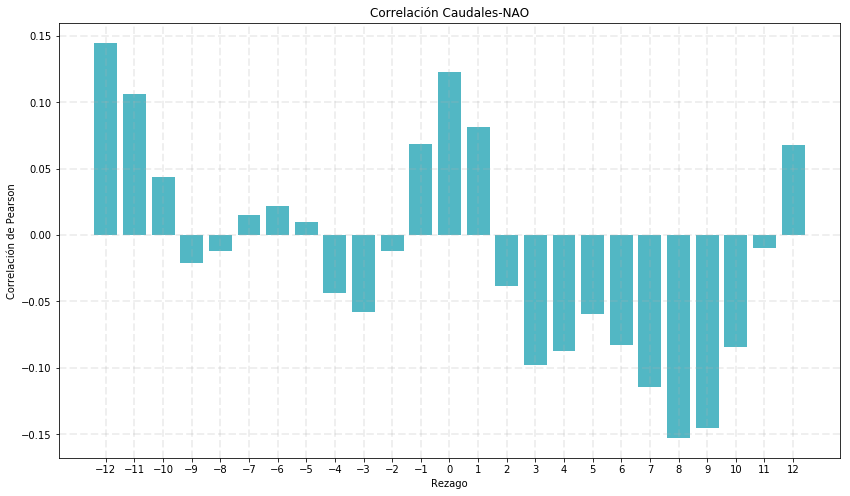

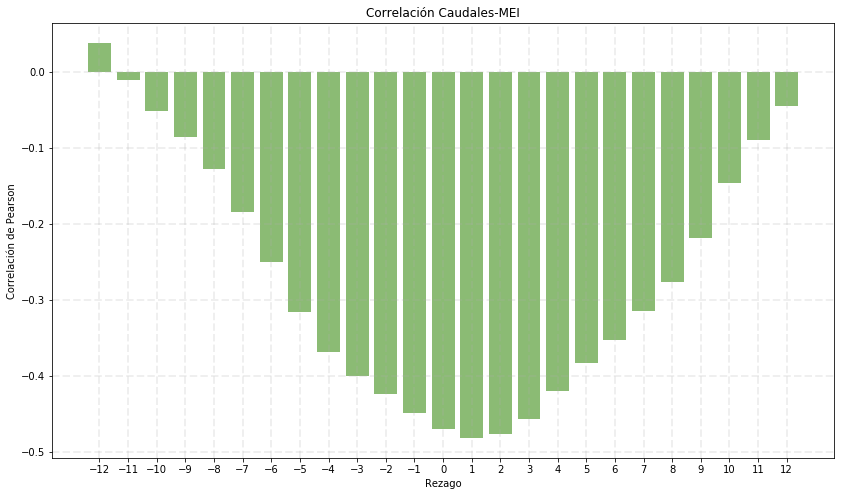

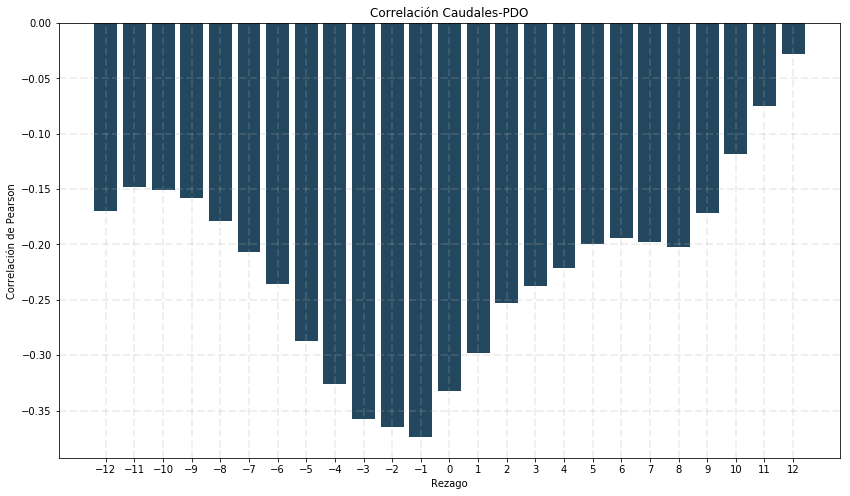

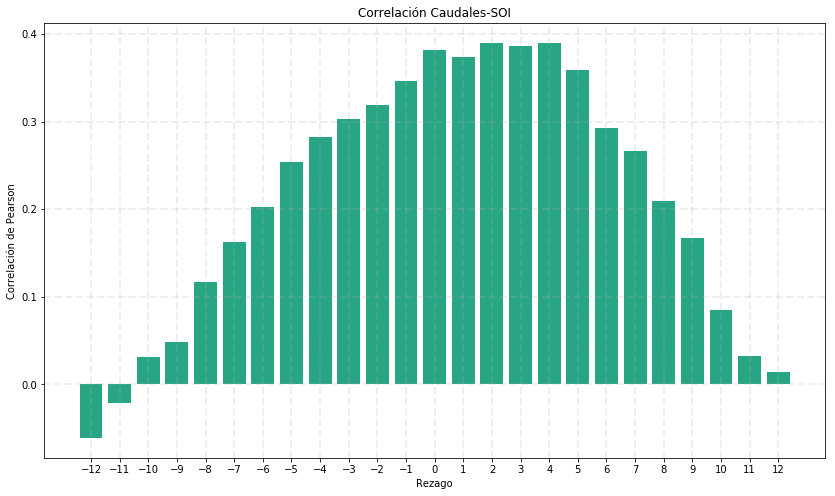

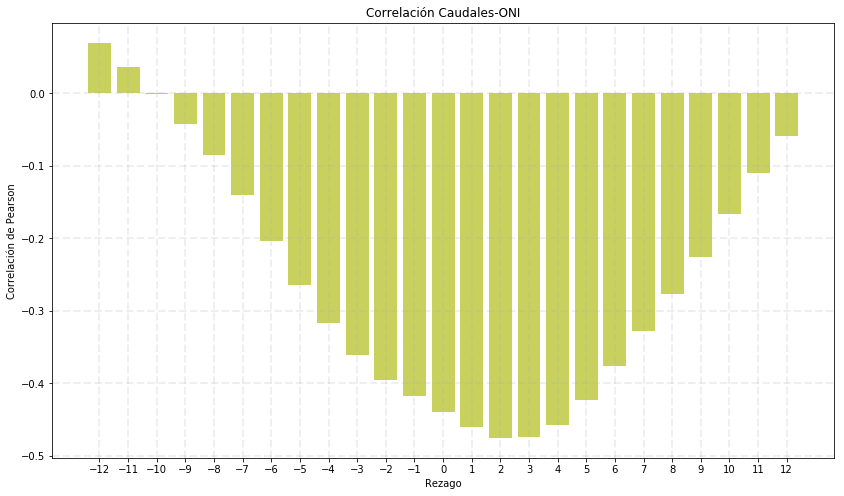

In [2]:
colores = [(82 /255., 183/255.,196/255.),(55 /255., 123/255.,148/255.),\
           (43 /255.,  72/255.,105/255.),(32 /255.,  34/255., 72/255.),\
           (34 /255.,  71/255., 94/255.),(31 /255., 115/255.,116/255.),\
           (39 /255., 165/255.,132/255.),(139/255., 187/255.,116/255.),\
           (200/255., 209/255., 93/255.),(249/255., 230/255., 57/255.)]

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sp
riogrande=pd.read_excel('./Riogrande.xlsx').set_index(u'Año')
index=pd.date_range('1950-01-01','2016-01-01',freq='M')
data=riogrande.values.ravel()
serie1=pd.Series(data,index)
serie1.name="Caudales"

def correlation (serie,c): #serie2mayuscula, preguntar datos SOI desde 1950
    
    serie2= pd.read_excel('./indices.xlsx',sheet_name = serie).set_index(u'AÑO')
    index=pd.date_range('1950-01-01','2016-01-01',freq='M')
    data=serie2.values.ravel()
    serie2=pd.Series(data,index)
    
    corr=[sp.pearsonr(serie1[:-i],serie2[i:])[0] for i in range(1,13)[::-1]]
    corr=corr+[sp.pearsonr(serie1,serie2)[0]]+[sp.pearsonr(serie1[i:],serie2[:-i])[0] for i in range(1,13)]
    
    serie2.name=serie
    fig=plt.figure(figsize=(14,8))
    ax=fig.add_subplot(111)
    ax.bar(range(-12,13),corr,color=colores[c])
    ax.set_title('Correlación '+serie1.name+'-'+serie2.name)
    ax.set_ylabel(u'Correlación de Pearson')
    ax.set_xlabel('Rezago')
    ax.set_xticks(range(-12,13))
    ax.grid(linestyle='--',lw=2,alpha=.2)
    
    return ax
    
correlation("NAO",0)
correlation("MEI",7)
correlation("PDO",4)
correlation("SOI",6)
correlation("ONI",8)